<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, models, layers

In [54]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(y_train[0])

1


In [5]:
max(max(x_train))

9995

In [6]:
max(max(x_test))

9927

In [7]:
ml = [max(x) for x in x_train]
max(ml)

9999

In [10]:
wi = datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [11]:
wi['hello']

4822

In [12]:
iw = {}
for key, value in wi.items():
    iw[value] = key

In [13]:
iw[4822]

'hello'

In [14]:
for i in x_train[0]:
    print(iw[i], end=' ')

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [15]:
for i in x_train:
    print(len(x_train[i]),end=' ')

218 189 141 550 147 43 123 562 233 130 450 99 117 238 109 129 163 752 212 177 129 140 256 888 93 142 220 193 171 221 174 647 233 162 597 234 51 336 139 231 704 142 861 132 122 570 55 214 103 186 113 169 469 138 302 766 351 146 59 206 107 152 186 431 147 684 383 324 252 263 787 211 314 118 390 132 710 306 167 115 95 158 156 82 502 314 190 174 60 145 214 659 408 515 461 202 238 170 107 171 158 145 790 258 287 67 123 975 775 236 195 274 214 91 1038 815 183 206 50 118 147 141 60 56 439 439 213 144 533 303 203 563 129 153 55 92 174 187 183 165 78 198 156 223 127 61 362 84 57 176 159 57 159 165 213 194 149 130 203 19 98 466 525 130 322 153 408 215 472 143 136 354 260 319 125 209 282 810 142 240 148 198 193 123 128 103 479 345 263 165 205 333 184 92 177 335 120 121 259 180 160 114 59 343 513 133 206 152 206 572 153 139 151 129 129 196 433 199 140 311 151 200 584 127 513 781 932 526 161 646 135 52 267 174 185 219 81 219 131 153 270 644 155 546 284 85 293 155 358 45 231 124 178 118 260 393 127 

In [16]:
import numpy as np

In [26]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i,j] = 1.
        return result

In [27]:
len(x_train[0]), type(x_train[0][0])

(218, int)

In [55]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [29]:
len(x_train[0]), type(x_train[0][0])

(10000, numpy.float64)

In [30]:
x_train.shape, x_train.dtype

((25000, 10000), dtype('float64'))

In [31]:
x_train = np.asarray(x_train).astype('float32') #경량화
x_test = np.asarray(x_test).astype('float32') #경량화

In [32]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [65]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [57]:
def myrelu(x):
    if x < 0:
        return 0
    return x

In [58]:
def my_leaky_relu(x,a): #0 <= a < 1
    if x < 0:
        return a*x
    return x

In [69]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [70]:
hist = model.fit(x_train, y_train, epochs=20,
                 validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 11s 16ms/step - loss: 0.6931 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 2/20
625/625 [==============================] - 10s 15ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 4/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 6/20
625/625 [==============================] - 9s 14ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4938

In [61]:
import matplotlib.pyplot as plt

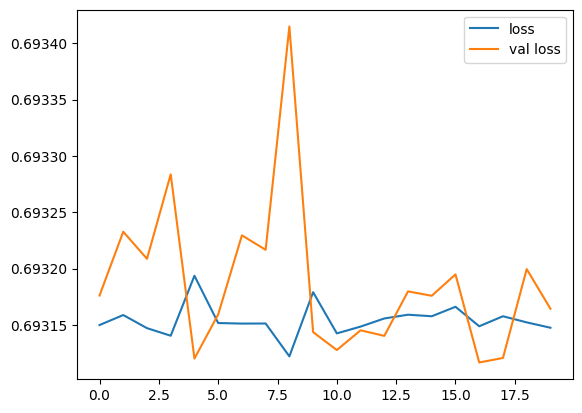

In [71]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [73]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
782/782 [==============================] - 8s 9ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 0.6932 - accuracy: 0.5010
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 0.6931 - accuracy: 0.5028
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 0.6932 - accuracy: 0.4962
Epoch 5/5
782/782 [==============================] - 4s 6ms/step - loss: 0.6931 - accuracy: 0.4989


In [74]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931697130203247, 0.4999600052833557]